# TD3, REDQTD3, PER plots

Recreating plots found in the report.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tueplots import axes, bundles, figsizes

plots_kwargs = bundles.neurips2024(usetex=False, rel_width=1, family="sans-serif")
plt.rcParams.update(
    plots_kwargs
)
plt.rcParams.update(axes.grid(grid_alpha=0.3))
plt.rcParams.update(axes.spines(right=False, top=False))
plt.rcParams["figure.autolayout"] = False
plt.rcParams["figure.constrained_layout.use"] = False
FIG_SCATTER = figsizes.neurips2024(nrows=0.5, ncols=0.5)["figure.figsize"]

In [2]:
redq_per = pd.read_csv("./redq_per_reward.csv")
redq_no_per = pd.read_csv("./redq_no_per_reward.csv")
td3_per = pd.read_csv("./td3_per_reward.csv")
td3_no_per = pd.read_csv("./td3_no_per_reward.csv")

In [3]:
# Create smooth rewards by applying a rolling mean with a window size of 500
redq_per["smooth_reward"] = redq_per["reward"].rolling(window=500).mean()
redq_no_per["smooth_reward"] = redq_no_per["reward"].rolling(window=500).mean()
td3_per["smooth_reward"] = td3_per["reward"].rolling(window=500).mean()
td3_no_per["smooth_reward"] = td3_no_per["reward"].rolling(window=500).mean()

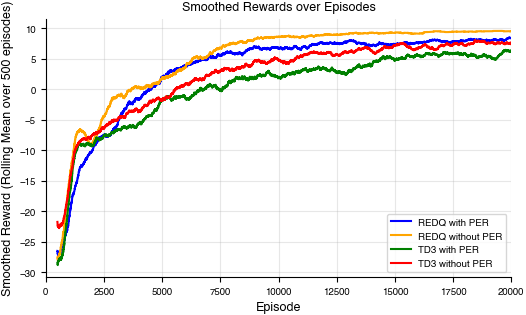

In [4]:
# Plot the smoothed rewards against episodes for first 20000 episodes
plt.figure(figsize=FIG_SCATTER)
plt.plot(redq_per["episode"], redq_per["smooth_reward"], label="REDQ with PER", color="blue")
plt.plot(redq_no_per["episode"], redq_no_per["smooth_reward"], label="REDQ without PER", color="orange")
plt.plot(td3_per["episode"], td3_per["smooth_reward"], label="TD3 with PER", color="green")
plt.plot(td3_no_per["episode"], td3_no_per["smooth_reward"], label="TD3 without PER", color="red")
plt.xlabel("Episode")
plt.ylabel("Smoothed Reward (Rolling Mean over 500 episodes)")
plt.title("Smoothed Rewards over Episodes")
plt.legend()
plt.xlim(0, 20000)
plt.grid()
plt.tight_layout()
# plt.savefig("./smoothed_rewards.png")
plt.show();

In [5]:
redq_selfplay = pd.read_csv("./redq_selfplay_rewards.csv")

In [6]:
# Add smoothing to reward for selfplay results
redq_selfplay["smooth_reward"] = redq_selfplay["reward"].rolling(window=500).mean()

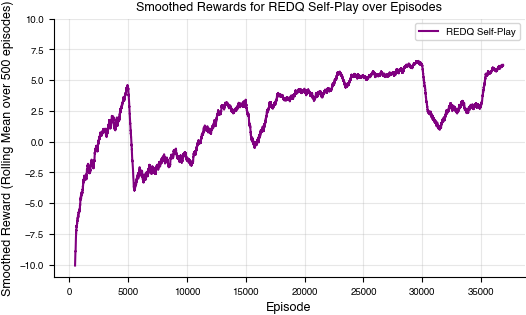

In [7]:
# Plot smoothed rewards for selfplay results
plt.figure(figsize=FIG_SCATTER)
plt.plot(redq_selfplay["episode"], redq_selfplay["smooth_reward"], label="REDQ Self-Play", color="purple")
plt.xlabel("Episode")
plt.ylabel("Smoothed Reward (Rolling Mean over 500 episodes)")
plt.title("Smoothed Rewards for REDQ Self-Play over Episodes")
plt.legend()
plt.ylim(-11, 10)
plt.grid()
plt.tight_layout()
# plt.savefig("./redq_selfplay_smoothed_rewards.png")
plt.show();